In [ ]:
# Circuit that we have used in swapping circuit is used in it. It works on simulator because
# it uses swapping gate which is not supported on actual IBM Quantum Computers curently.
# it takes four numbers at a time e.g (11,10,01,00) and sorts them.

# In this circuit we take two number in 1st gate(q0,q5 and q1,q6) and two number in 2nd gate(q9,q14 and q10,q15).
# After Swapping we use same gate to swap middle number that comes after swapping from first two gates. Repats 
# the same proces again one time to achive the requirment and we used minimum reset operations to achive our goal.


In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
import numpy as np
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
qr1 = QuantumRegister(4)
circuit = QuantumCircuit(qr1)

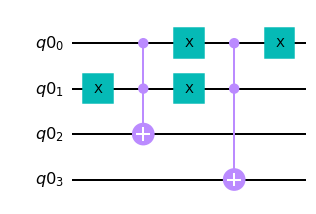

In [3]:
#  Uc 
circuit.x(qr1[1])
circuit.ccx(qr1[0],qr1[1],qr1[2])
circuit.x(qr1[0])
circuit.x(qr1[1])
circuit.ccx(qr1[0],qr1[1],qr1[3])
circuit.x(qr1[0])
circuit.draw(output='mpl')

In [4]:
# Making UC circuit a gate
UC = circuit.to_gate()
type(UC)

qiskit.circuit.gate.Gate

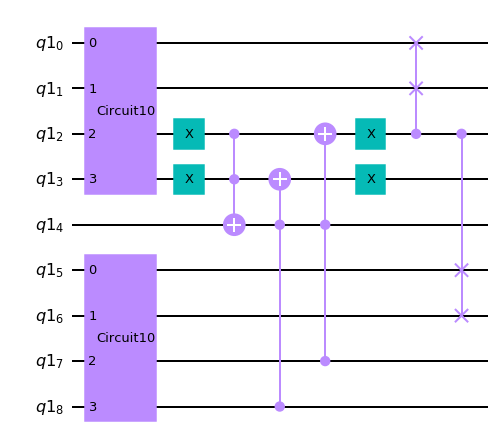

In [5]:
com = QuantumRegister(9)
circuit1 = QuantumCircuit(com)


circuit1.append(UC,[0,1,2,3])
circuit1.append(UC,[5,6,7,8])

circuit1.x(com[2])
circuit1.x(com[3])
circuit1.ccx(com[2],com[3],com[4])
circuit1.ccx(com[8],com[4],com[3])
circuit1.ccx(com[7],com[4],com[2])
circuit1.x(com[2])
circuit1.x(com[3])


circuit1.cswap(com[2], com[0], com[1])
circuit1.cswap(com[2], com[5], com[6])


#circuit1.cswap(com[3], com[0], com[1])
#circuit1.cswap(com[3], com[5], com[6])

# Measuring Significant output
#circuit1.measure(com[2],mea[0])
#circuit1.measure(com[3],mea[1])
circuit1.draw(output='mpl')




In [6]:
Excswapgate2bit = circuit1.to_gate()
type(Excswapgate2bit)

qiskit.circuit.gate.Gate

In [7]:
coms = QuantumRegister(18)


firstnum = ClassicalRegister(2)
secondnum = ClassicalRegister(2)
thirdnum  = ClassicalRegister(2)
fourthnum  = ClassicalRegister(2)


circuit2 = QuantumCircuit(coms,firstnum,secondnum,thirdnum,fourthnum)

initial=[[1,0],[0,1]]


#Inputs

circuit2.initialize(initial[1], 0)
circuit2.initialize(initial[1], 5)


circuit2.initialize(initial[1], 1)
circuit2.initialize(initial[0], 6)


circuit2.initialize(initial[0], 9)
circuit2.initialize(initial[1], 14)


circuit2.initialize(initial[0], 10)
circuit2.initialize(initial[0], 15)



circuit2.reset(coms[2])
circuit2.reset(coms[3])
circuit2.reset(coms[4])
circuit2.reset(coms[7])
circuit2.reset(coms[8])

circuit2.reset(coms[11])
circuit2.reset(coms[12])
circuit2.reset(coms[13])
circuit2.reset(coms[16])
circuit2.reset(coms[17])



circuit2.append(Excswapgate2bit,[0,1,2,3,4,5,6,7,8])
circuit2.append(Excswapgate2bit,[9,10,11,12,13,14,15,16,17])










In [8]:

simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit2, backend = simulator, shots = 1).result()
counts = result.get_counts()

print(counts)
#circuit2.draw(output='mpl')

{'00 00 00 00': 1}


In [9]:

circuit2.barrier()


circuit2.reset(coms[2])
circuit2.reset(coms[3])
circuit2.reset(coms[4])
circuit2.reset(coms[7])
circuit2.reset(coms[8])


circuit2.append(Excswapgate2bit,[1,9,2,3,4,6,14,7,8])


circuit2.barrier()

circuit2.reset(coms[2])
circuit2.reset(coms[3])
circuit2.reset(coms[4])
circuit2.reset(coms[7])
circuit2.reset(coms[8])

circuit2.reset(coms[11])
circuit2.reset(coms[12])
circuit2.reset(coms[13])
circuit2.reset(coms[16])
circuit2.reset(coms[17])

circuit2.append(Excswapgate2bit,[0,1,2,3,4,5,6,7,8])
circuit2.append(Excswapgate2bit,[9,10,11,12,13,14,15,16,17])

circuit2.barrier()

circuit2.reset(coms[2])
circuit2.reset(coms[3])
circuit2.reset(coms[4])
circuit2.reset(coms[7])
circuit2.reset(coms[8])


circuit2.append(Excswapgate2bit,[1,9,2,3,4,6,14,7,8])



circuit2.barrier()

circuit2.measure(coms[0],  firstnum[0])
circuit2.measure(coms[5],  firstnum[1])

circuit2.measure(coms[1], secondnum[0])
circuit2.measure(coms[6], secondnum[1])



circuit2.measure(coms[9],  thirdnum[0])
circuit2.measure(coms[14],  thirdnum[1])

circuit2.measure(coms[10], fourthnum[0])
circuit2.measure(coms[15], fourthnum[1])



simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit2, backend = simulator, shots = 1).result()
counts = result.get_counts()

(counts)







{'11 01 10 00': 1}

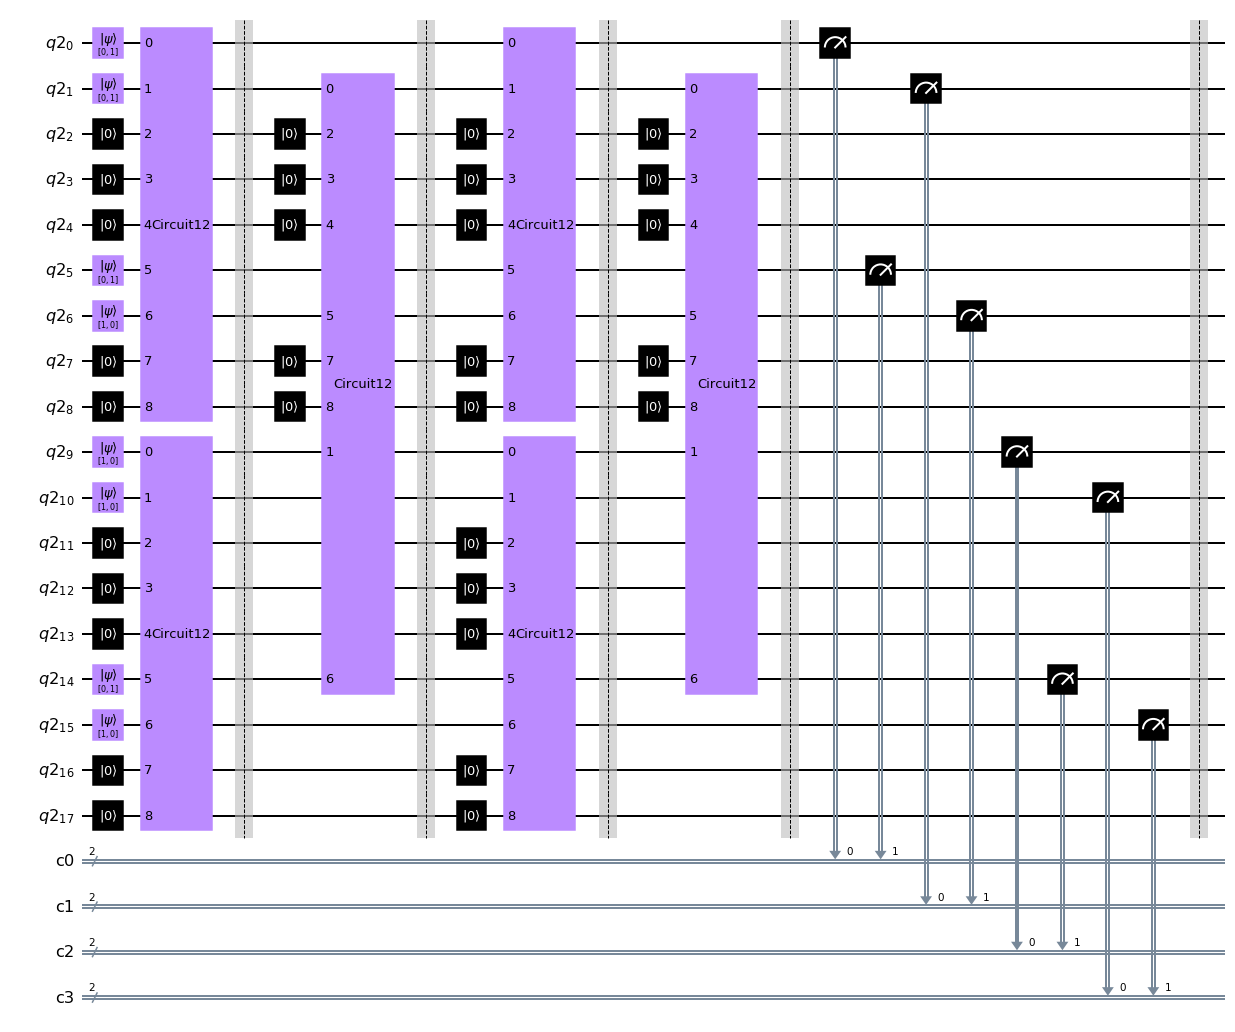

In [10]:
circuit2.barrier()
circuit2.draw(output='mpl')